In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

### The goal of this notebook is to visualize the State of Maryland's contact tracing data in an attempt to gain some understanding as to where cases have been recently rising, employment-wise.

#### According to the state, [the data in question reflects](https://coronavirus.maryland.gov/datasets/md-covid19-contacttracing-casesreportedemployment-totals) "the number of cases interviewed who had a completed answer to the question asking if they had physically gone to work in the last 14 days during their covidLINK interviews". The data is cumulative which means we really only have to focus on data from the previous couple of months.

### Part I. Cleaning

In [2]:
df = pd.read_csv('./resources/md_contacttracing_by_employment.csv')

In [3]:
df.head()

,OBJECTID,ReportDate,StartDate,EndDate,BARBER_SALON_SPA_SERVICES,CHILDCARE_EDUCATION,CONSTRUCTION_MANUFACTURING,HEALTHCARE,HOTELS_HOSPITALITY_JANITORIAL,OTHER_NON_PUBLIC_FACING,OTHER_PUBLIC_FACING,POLICE_FIRE_MILITARY,RESTAURANT_FOOD_SERVICE,RETAIL_ESSENTIAL_WORKERS,RETAIL_OTHER,TRANSPORTATION
0,1,2020/07/20 14:00:00+00,2020/07/10 14:00:00+00,2020/07/18 14:00:00+00,0,8,20,89,15,82,NaN,3,35,10,10,16
1,2,2020/07/29 14:00:00+00,2020/07/10 14:00:00+00,2020/07/25 14:00:00+00,0,17,32,177,22,116,NaN,10,81,22,21,25
2,3,2020/08/05 14:00:00+00,2020/07/10 14:00:00+00,2020/08/01 14:00:00+00,1,22,50,232,31,188,NaN,28,135,34,37,50
3,4,2020/08/12 14:00:00+00,2020/07/10 14:00:00+00,2020/08/08 14:00:00+00,5,25,63,314,42,268,NaN,42,157,44,49,70
4,5,2020/08/19 14:00:00+00,2020/07/10 14:00:00+00,2020/08/15 14:00:00+00,11,32,88,409,52,325,NaN,53,206,54,53,78


In [4]:
df.dtypes

OBJECTID                           int64
ReportDate                        object
StartDate                         object
EndDate                           object
BARBER_SALON_SPA_SERVICES          int64
CHILDCARE_EDUCATION                int64
CONSTRUCTION_MANUFACTURING         int64
HEALTHCARE                         int64
HOTELS_HOSPITALITY_JANITORIAL      int64
OTHER_NON_PUBLIC_FACING            int64
OTHER_PUBLIC_FACING              float64
POLICE_FIRE_MILITARY               int64
RESTAURANT_FOOD_SERVICE            int64
RETAIL_ESSENTIAL_WORKERS           int64
RETAIL_OTHER                       int64
TRANSPORTATION                     int64
dtype: object

### Changing the ReportDate column to a usable data format

In [5]:
df['ReportDate'] = pd.to_datetime(df['ReportDate'])

In [6]:
df.dtypes

OBJECTID                                       int64
ReportDate                       datetime64[ns, UTC]
StartDate                                     object
EndDate                                       object
BARBER_SALON_SPA_SERVICES                      int64
CHILDCARE_EDUCATION                            int64
CONSTRUCTION_MANUFACTURING                     int64
HEALTHCARE                                     int64
HOTELS_HOSPITALITY_JANITORIAL                  int64
OTHER_NON_PUBLIC_FACING                        int64
OTHER_PUBLIC_FACING                          float64
POLICE_FIRE_MILITARY                           int64
RESTAURANT_FOOD_SERVICE                        int64
RETAIL_ESSENTIAL_WORKERS                       int64
RETAIL_OTHER                                   int64
TRANSPORTATION                                 int64
dtype: object

In [7]:
df.tail()

,OBJECTID,ReportDate,StartDate,EndDate,BARBER_SALON_SPA_SERVICES,CHILDCARE_EDUCATION,CONSTRUCTION_MANUFACTURING,HEALTHCARE,HOTELS_HOSPITALITY_JANITORIAL,OTHER_NON_PUBLIC_FACING,OTHER_PUBLIC_FACING,POLICE_FIRE_MILITARY,RESTAURANT_FOOD_SERVICE,RETAIL_ESSENTIAL_WORKERS,RETAIL_OTHER,TRANSPORTATION
33,34,2021-03-10 15:00:00+00:00,2020/07/10 15:00:00+00,2021/03/06 15:00:00+00,703,2928,6927,14792,1675,14796,NaN,2896,5867,3053,3868,2937
34,35,2021-03-17 15:00:00+00:00,2020/07/10 15:00:00+00,2021/03/13 15:00:00+00,722,3003,7087,14963,1717,15178,NaN,2947,5979,3132,3962,3052
35,36,2021-03-24 15:00:00+00:00,2020/07/10 15:00:00+00,2021/03/20 15:00:00+00,742,3076,7229,15173,1756,15573,NaN,3010,6112,3203,4058,3132
36,37,2021-03-31 15:00:00+00:00,2020/07/10 15:00:00+00,2021/03/27 15:00:00+00,771,3197,7423,15401,1802,16107,NaN,3092,6299,3289,4214,3243
37,38,2021-04-07 15:00:00+00:00,2020/07/10 15:00:00+00,2021/04/03 15:00:00+00,803,3285,7599,15642,1846,16623,NaN,3152,6503,3407,4362,3380


In [8]:
months = df.groupby('ReportDate')[['BARBER_SALON_SPA_SERVICES', 'CHILDCARE_EDUCATION','CONSTRUCTION_MANUFACTURING','CONSTRUCTION_MANUFACTURING','HEALTHCARE','HOTELS_HOSPITALITY_JANITORIAL','OTHER_NON_PUBLIC_FACING','POLICE_FIRE_MILITARY','RESTAURANT_FOOD_SERVICE','RETAIL_ESSENTIAL_WORKERS','RETAIL_OTHER','TRANSPORTATION']].sum()
months_2 = df.groupby('ReportDate')[['HEALTHCARE','OTHER_NON_PUBLIC_FACING']].sum()

In [9]:
months.tail()

,BARBER_SALON_SPA_SERVICES,CHILDCARE_EDUCATION,CONSTRUCTION_MANUFACTURING,CONSTRUCTION_MANUFACTURING,HEALTHCARE,HOTELS_HOSPITALITY_JANITORIAL,OTHER_NON_PUBLIC_FACING,POLICE_FIRE_MILITARY,RESTAURANT_FOOD_SERVICE,RETAIL_ESSENTIAL_WORKERS,RETAIL_OTHER,TRANSPORTATION
ReportDate,,,,,,,,,,,,
2021-03-10 15:00:00+00:00,703,2928,6927,6927,14792,1675,14796,2896,5867,3053,3868,2937
2021-03-17 15:00:00+00:00,722,3003,7087,7087,14963,1717,15178,2947,5979,3132,3962,3052
2021-03-24 15:00:00+00:00,742,3076,7229,7229,15173,1756,15573,3010,6112,3203,4058,3132
2021-03-31 15:00:00+00:00,771,3197,7423,7423,15401,1802,16107,3092,6299,3289,4214,3243
2021-04-07 15:00:00+00:00,803,3285,7599,7599,15642,1846,16623,3152,6503,3407,4362,3380


### Part II. Visualizing

#### At first I plotted the data to see what the general situation looked like. (Each dot is a data point.) I noticed that all of the lines near the end were fairly flat – except for the two highest.

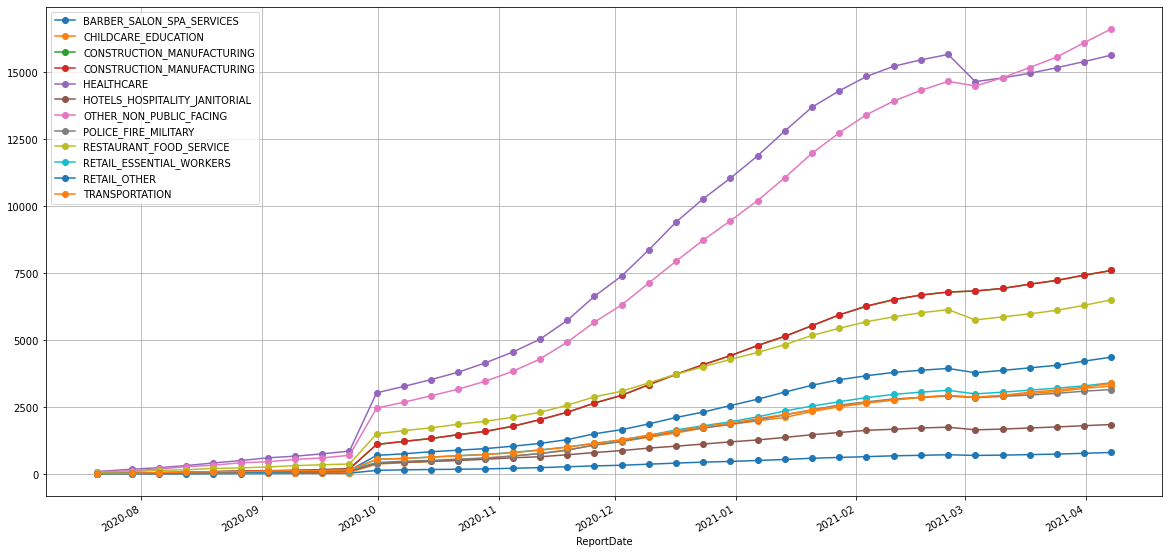

In [18]:
months.plot.line(figsize=(20,10),ylabel='', xlabel='ReportDate', marker='o')
plt.grid()
plt.show()

#### So I singled them out on a separate plot to see what the actual ranges were.

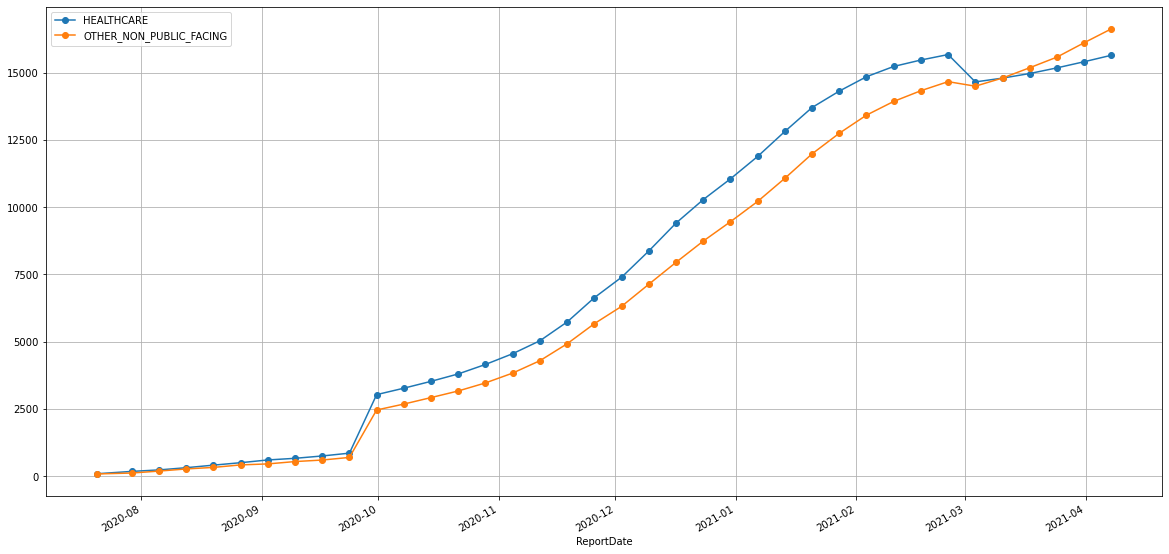

In [19]:
months_2.plot.line(figsize=(20,10),ylabel='', xlabel='ReportDate', marker='o')
plt.grid()
plt.show()

In [15]:
zoom_months_2 = months_2[28:]

#### And I wanted to get a closer look so I focused only on the most recent months (February and March to now).

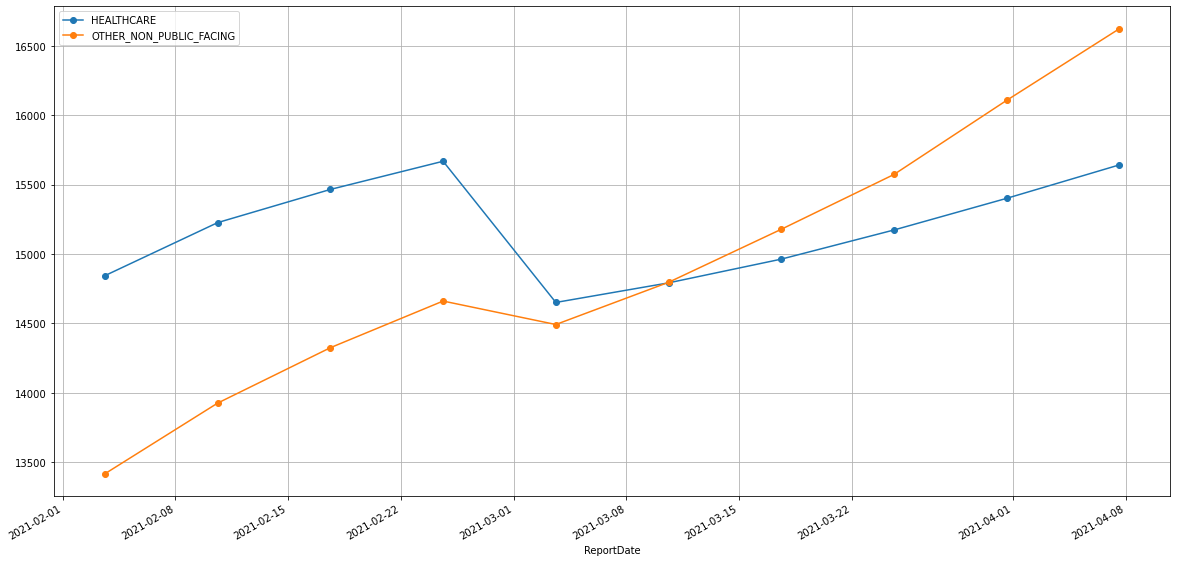

In [20]:
zoom_months_2.plot.line(figsize=(20,10),ylabel='', xlabel='ReportDate', marker='o')
plt.grid()
plt.show()

### Part III. Some thoughts

#### We can see that the range of difference is pretty wide, especially for the orange line, which represents "Other_Non_Public_Facing". The state defined that category as (but not limited to): "Includes workers that do not have direct interactions with the public, including warehouse workers, some office workers, some car mechanics, etc". I think this makes sense because we have seen in the past that congregate settings such as warehouse workers and other distribution centers have been covid hotspots, though I think this line would also include food processing plants which would also fit the pattern but I'm not 100% sure.
#### The other interesting node is the HEALTHCARE line, which the state defines as "Includes home healthcare and administrative positions in a healthcare setting". I assume that is in addition to hospitals and other clinics. That said, we can see that they make progress near the beginning of March – only to then gradually rise back up a couple of weeks later to pre-March levels. Although not as strong a climb as the orange line, I thought that the blue line still was rather interesting because I would have assumed that workers in healthcare-related settings would have been vaccinated by now and start to see decreases in general.